## Abstraction

### agent environment and goal
- Set-up: Double-jointed arm which can move to target locations.
- Goal: Each agent must move its hand to the goal location, and keep it there.
- Agents: The environment contains 20 agents linked to a single Brain.
- Agent Reward Function (independent):
- +0.1 for each timestep agent's hand is in goal location.
- Brains: One Brain with the following observation/action space.
- Vector Observation space: 33 variables corresponding to position, rotation, velocity, and angular velocities of the two arm Rigidbodies.
- Vector Action space: (Continuous) Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between -1 and 1.
- Visual Observations: None.
- Reset Parameters: Two, corresponding to goal size, and goal movement speed.
- Benchmark Mean Reward: 30

### Implement both tow methods(PPO, DDPG)
To solve the problem I have used both PPO and DDPG algorithms, the PPO method to solve this task is much better than DDPG method.

DDPG method can solve this task by few epsiodes. As we can see at this task, DDPG had strong data efficiency and  converge fast to got high score, but to solve this task costs many hours even run in gpu.

PPO method can complete this task by more epsiodes, but takes less than twenty minutes even run in cpu.

## Learning Alogorithm - PPO

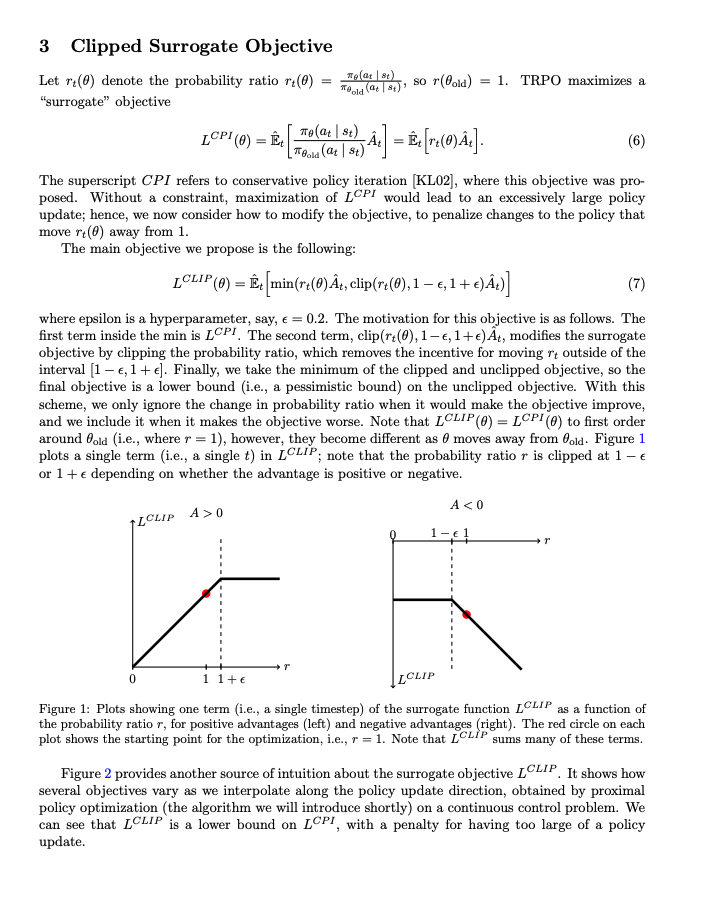

PPO is the policy-based method derived from TRPO (Trust Region Policy Optimization). PPO calculates gradient based on policy likelihood ratio between old one and updated new one. PPO uses clipping for likelihood ratios to prevent gradient explosion.
       

### Improve method
1. GAE is the method to calculate "generalized advantage", which balance between TD-error and discounted sum of rewards. It can help agent to learn more "smoothly" by reduce the std.deviation from action to destination.

2. Both use actor and critic model to learn seperately, It can help the agent to evaluate target value more accurately ,which is called reduce bias from action to destination.

## Learning Alogorithm - DDPG
DDPG is outlined in [this paper](https://arxiv.org/pdf/1509.02971.pdf), Continuous Control with Deep Reinforcement Learning, by researchers at Google Deepmind. In this paper, the authors present "a model-free, off-policy actor-critic algorithm using deep function approximators that can learn policies in high-dimensional, continuous action spaces." 

It is also use actor and critic model but there are two mainly different:
1. Just like Double Q-learning, we're again leveraging local and target networks to improve stability. This is where one set of parameters w is used to select the best action, and another set of parameters w' is used to evaluate that action. It looks like an half value based method, and use soft update model weights.
2. In order to estimate actions by critic model, this model just concat aciton dimension to its model layer, very simple!
3. DDPG can be viewed as an extension of Double Q-learning to solve continuous tasks target network ues soft update method.

## Model :
    Two methods model are quite similar.
    The PPO model code in model.py file and DDPG model code in model_DDPG.py file

###  Actor Model: (PPO and DDPG are same)

- Fully connected layer - input: 33 (state size) output: 400
- Fully connected layer - input: 400 output 300
- Fully connected layer - input: 300 output: 4 (action size)

### Critic Model (PPO)
- Fully connected layer - input: 33 (state size) output: 400
- Fully connected layer - input: 400 output 300
- Fully connected layer - input: 300 output: 1 

### Critic Model (DDPG)
- Fully connected layer - input: 33 (state size) output: 400
- Fully connected layer - input: 400+(action size) output 300
- Fully connected layer - input: 300 output: 1 


## Hyper Parameters(PPO):

<table width=600>
<tr><td>Mini batch  </td><td> 128    </td></tr>     
<tr><td>SGD_EPOCH </td><td>  5   </td></tr>
<tr><td>Gamma  </td><td> 0.99    </td></tr>
<tr><td>Common LR </td><td> 1e-4   </td></tr>
<tr><td>Actor LR  </td><td> 3e-4   </td></tr>
<tr><td>Critic LR  </td><td> 1e-3   </td></tr>
<tr><td>Actor Model  </td><td> Adam optimizer   </td></tr>
<tr><td>Critic Model  </td><td>  Adam optimizer    </td></tr>     
<tr><td>Tau  </td><td> 0.95         </td></tr>           
<tr><td>Beta  </td><td> 0.01    </td></tr>
<tr><td>EPSILON  </td><td> 0.2    </td></tr>
<tr><td>EPSILON_DECAY </td><td> 0.999   </td></tr>
</table>

## Hyper Parameters(DDPG):

<table width=600>
<tr><td>Memory buffer size  </td><td> 1e6    </td></tr>     
<tr><td>Batch size </td><td>  200   </td></tr>
<tr><td>Gamma  </td><td> 0.99    </td></tr>
<tr><td>Actor LR  </td><td> 1e-3   </td></tr>
<tr><td>Critic LR  </td><td> 1e-3   </td></tr>
<tr><td>Actor Model  </td><td> Adam optimizer   </td></tr>
<tr><td>Critic Model  </td><td>  Adam optimizer    </td></tr>     
<tr><td>Tau (soft update)  </td><td> 1e-3          </td></tr>           
<tr><td>update target network frequency  </td><td> 8    </td></tr>
<tr><td>number of learning passs  </td><td> 20    </td></tr>
<tr><td>WEIGHT_DECAY </td><td> 0.000   </td></tr>
</table>

## Plot of Result (PPO)

### actor and critic model run on CPU and use seperate optimizer to learn
    From 'Reacher20_PPO_A&C.ipynb' juypter notebook ,Environment run by cpu and solved at 110 episodes. It just costs about 20minutes.	Average Score: 31.7. Indeep agent reached the top score close to 50 episodes and cost almost 10minutes, as we can see it is run stable after that!
    The second and third picture shows actor and critic model loss value by each SDG step.
    Note that, the actor and critic use different learning optimizer and rate.
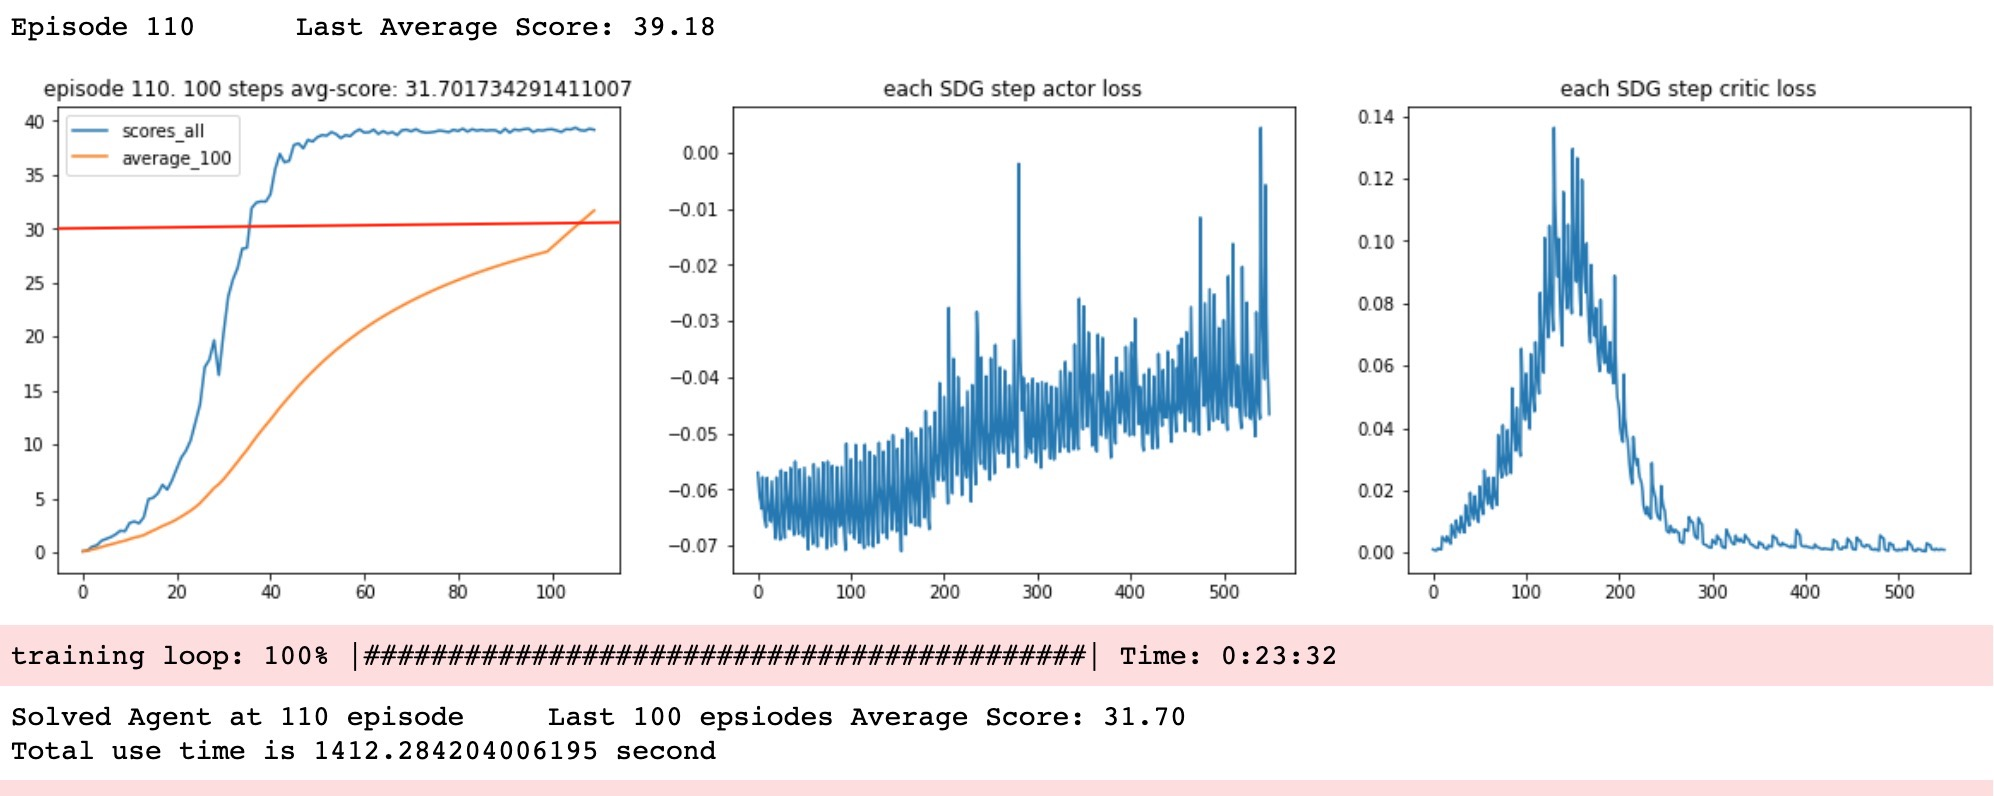

### actor and critic model run on GPU and use common optimizer to learn
    From 'Reacher20_PPO_A.ipynb' juypter notebook ,Environment run by gpu in udacity workespace and solved at 130 episodes. It just costs about 14.5minutes.	Average Score: 31.29. Indeep agent reached the top score close to 90 episodes and cost almost 10minutes, as we can see it is run stable after that!
    The second picture shows add actor and critic model loss value by each SDG step.
    Note that, the actor and cirtic use the same optimizer and learning rate.
    At this test, it may be better to choice first method of seperate optimizer. 
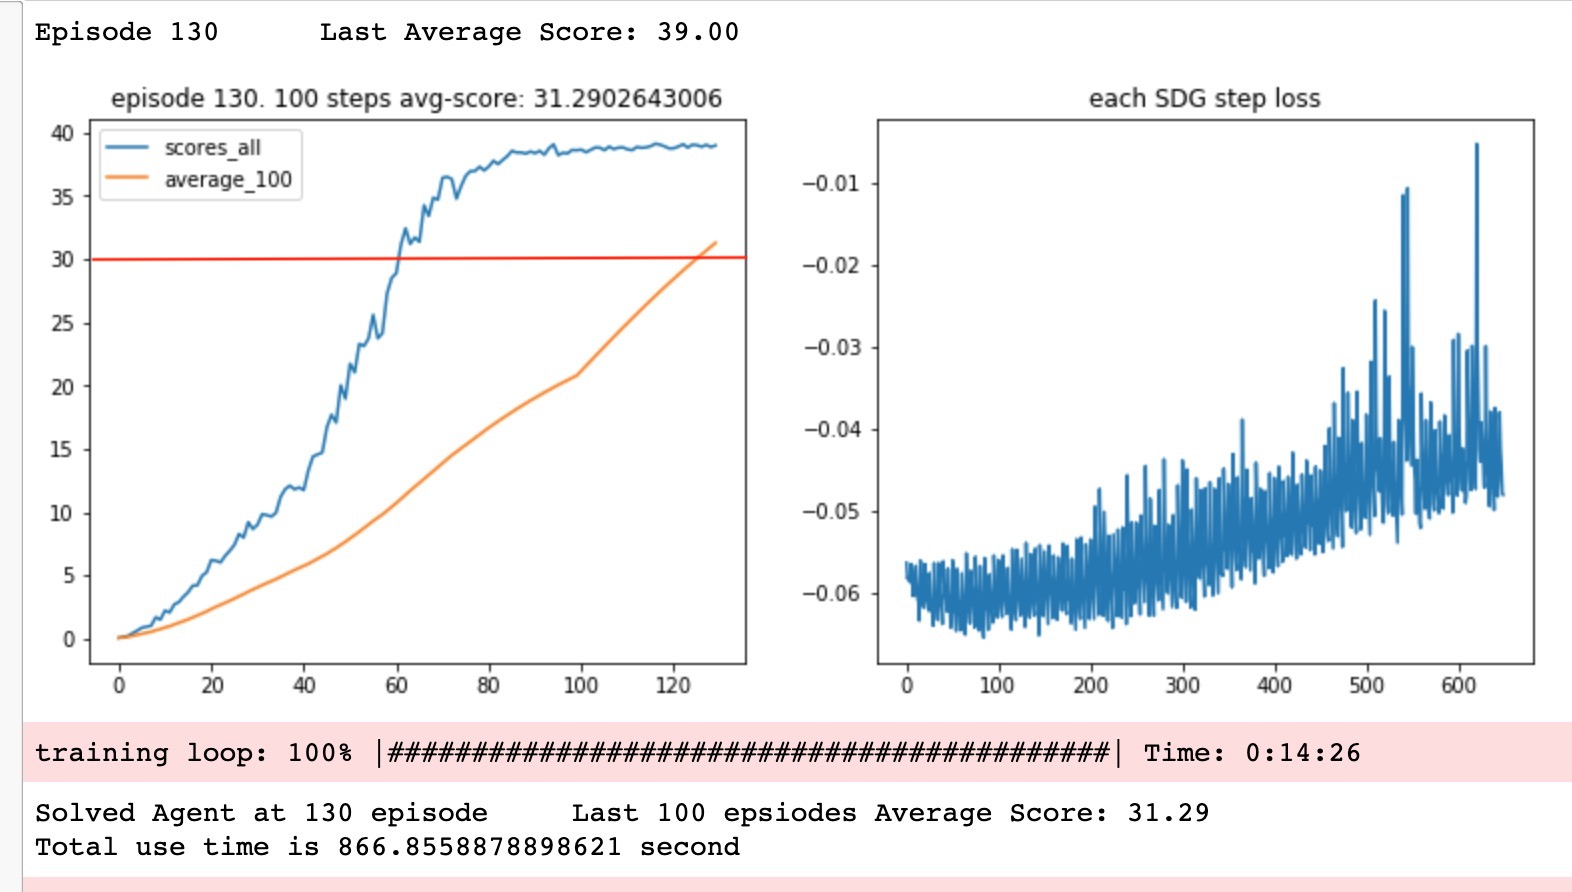

## Plot of Result (DDPG)
From 'Reacher20_DDPG.ipynb' juypter notebook Environment run by GPU in udacity workespace and solved at 110(50+40+20) episodes. It costs many hours and I don't calculate. I use these three line pictures because I can't complete this task at one time. These three line pictures are my training order
1. First line pictures average score got 23.9, the agent almost reach 37 scores.
2. Secod line pictures agerage score got (35.93*40 + 23.9*50)/90 = 29.24. As we can see it reached top score but not very stable.
3. The Second picture average score above 30 scores, also it not very stable.
all these pictures show the actor and critic loss value.

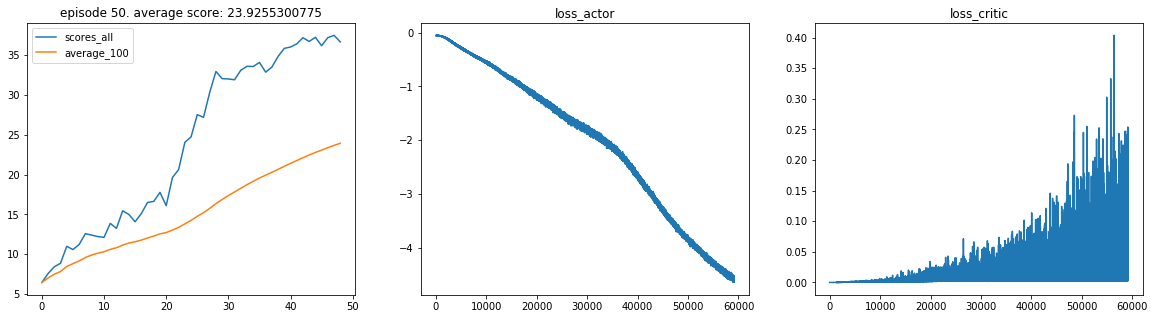

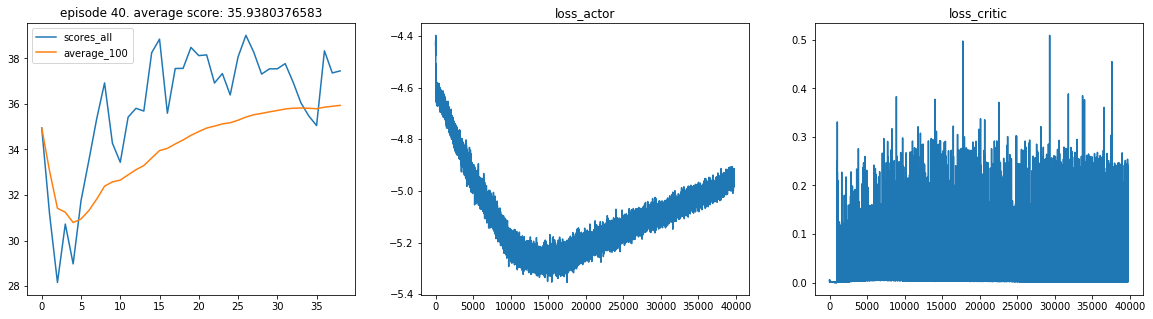

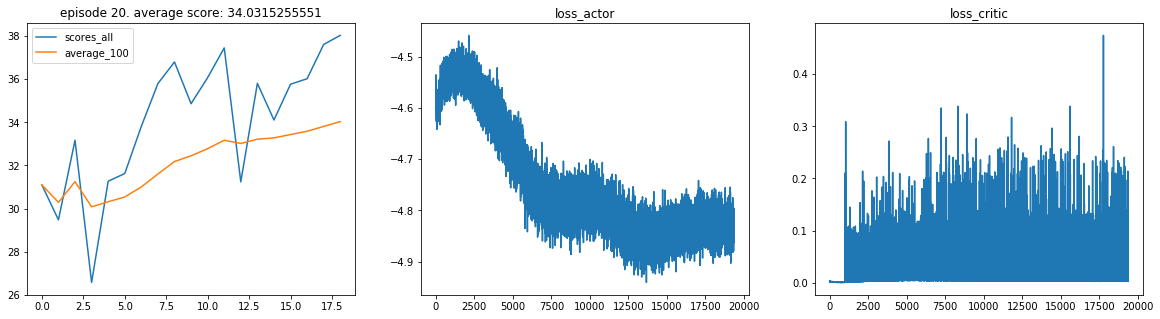

## Future work and improvement

1. Explore more algorithms like A3C and D4PG.
2. Complete optional challenge: Crawler Environment
3. Think more about finace environment and combine knowledge from Udacity course of AI for trading and RL to practise quant trading.

## Reference
https://arxiv.org/abs/1509.02971 Continuous control with deep reinforcement learning.

https://arxiv.org/pdf/1707.06347 Proximal Policy Optimization Algorithms.

[https://github.com/ShangtongZhang/DeepRL] Implementation many deep RL algorithms.

[https://github.com/udacity/deep-reinforcement-learning/tree/master/finance] Udacity course to implement finace by DDPG